In [1]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from wordcloud import WordCloud

###Loading of the Zomato dataset.

##Preprocessing of the data

###Exploring the data

In [3]:
pd.read_csv(r"C:\Users\SHOBHA REDDY\OneDrive\Desktop\zomato_restaurants_in_India 2.csv")

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [4]:
data  = pd.read_csv(r"C:\Users\SHOBHA REDDY\OneDrive\Desktop\zomato_restaurants_in_India 2.csv")

In [5]:
data.shape

(211944, 26)

In [6]:
data.tail()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['Café'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


In [7]:
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [8]:
data.city.unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [9]:
data.city.nunique()

99

In [10]:
data[data['city'] == "Mumbai"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
134852,18562340,Drinkery 51,['Casual Dining'],https://www.zomato.com/mumbai/drinkery-51-band...,"1st Floor, Vibgyor Towers, Bandra Kurla Comple...",Mumbai,3,Bandra Kurla Complex,19.067176,72.867493,...,4,Rs.,"['Dinner', 'Debit Card', 'Lunch', 'Serves Alco...",4.4,Very Good,3796,1897,0.0,1,-1
134853,34757,Joey's Pizza,['Quick Bites'],https://www.zomato.com/mumbai/joeys-pizza-mala...,"Shop 1, Plot D, Samruddhi Complex, Chincholi B...",Mumbai,3,Malad West,19.178188,72.834666,...,2,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.5,Excellent,7932,4960,0.0,-1,-1
134854,18548172,Hitchki,['Bar'],https://www.zomato.com/mumbai/hitchki-powai?ut...,"5, Transocean, Hiranandani Business Park, Lake...",Mumbai,3,Powai,19.119930,72.907331,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.7,Excellent,3762,12979,0.0,1,-1
134855,18392725,Tamasha,['Lounge'],https://www.zomato.com/mumbai/tamasha-lower-pa...,"Ground Floor, Victoria House, E.B Marg, Lower ...",Mumbai,3,Lower Parel,19.006060,72.827496,...,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Cred...",4.7,Excellent,4979,16595,0.0,-1,-1
134856,18962112,Bayroute,['Fine Dining'],https://www.zomato.com/mumbai/bayroute-juhu?ut...,"14, Silver Beach Estate, A.B. Nair Road, Oppos...",Mumbai,3,Juhu,19.110684,72.825368,...,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.9,Excellent,706,2484,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142348,46792,BOX8- Desi Meals,[],https://www.zomato.com/mumbai/box8-desi-meals-...,"102, Bhavani Industrial Estate, Opposite IIT B...",Mumbai,3,Powai,19.124284,72.914877,...,1,Rs.,"['Cash', 'Debit Card', 'Takeaway Available', '...",4.0,Very Good,726,703,0.0,1,-1
142349,37750,Faasos,['Quick Bites'],https://www.zomato.com/mumbai/faasos-veera-des...,"Shop 06, Building 2, Pramukh Park Rehab CHS Li...",Mumbai,3,Veera Desai Area,19.139601,72.833119,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,510,251,0.0,1,-1
142350,18165909,Charcoal Eats Express,['Quick Bites'],https://www.zomato.com/mumbai/charcoal-eats-ex...,"Opposite Kamala Mills, Lower Parel, Mumbai",Mumbai,3,Lower Parel,19.002537,72.829391,...,2,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'St...",4.0,Very Good,491,344,0.0,-1,-1
142351,18306481,Wok Express,['Food Court'],https://www.zomato.com/mumbai/wok-express-1-an...,"Food Court, 2nd Floor, Infinity Mall, Unit 215...",Mumbai,3,"Infiniti Mall, Andheri Lokhandwala, Andheri West",19.141117,72.831181,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Mall Parki...",3.7,Good,515,490,0.0,-1,-1


In [11]:
data[data['city'] == "Hyderabad"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
77501,18392031,Gol Bungalow - Taj Falaknuma Palace,['Fine Dining'],https://www.zomato.com/hyderabad/gol-bungalow-...,"Taj Falaknuma Palace, Falaknuma, Hyderabad",Hyderabad,6,"Taj Falaknuma, Falaknuma",17.334338,78.467603,...,4,Rs.,"['Cash', 'Dinner', 'Credit Card', 'No Alcohol ...",3.9,Good,38,20,0.0,-1,-1
77502,91817,Adaa - Taj Falaknuma Palace,['Fine Dining'],https://www.zomato.com/hyderabad/adaa-taj-fala...,"Taj Falaknuma Palace, Falaknuma, Hyderabad",Hyderabad,6,"Taj Falaknuma, Falaknuma",17.334283,78.467568,...,4,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'De...",4.5,Excellent,1087,627,0.0,-1,-1
77503,91818,Celeste - Taj Falaknuma Palace,['Fine Dining'],https://www.zomato.com/hyderabad/celeste-taj-f...,"Taj Falaknuma Palace, Falaknuma, Hyderabad",Hyderabad,6,"Taj Falaknuma, Falaknuma",17.334312,78.467562,...,4,Rs.,"['Breakfast', 'Lunch', 'Cash', 'Debit Card', '...",4.4,Very Good,316,356,0.0,-1,-1
77504,18908475,Vineela Yadlapalli Cakes,['Bakery'],https://www.zomato.com/hyderabad/vineela-yadla...,"Plot 805, Behind B-DUBS, Road Number 36, CBI C...",Hyderabad,6,Jubilee Hills,17.433280,78.404894,...,4,Rs.,"['Cash', 'Takeaway Available', 'Debit Card', '...",3.5,Good,29,22,0.0,-1,-1
77505,92745,Thai Pavilion - Vivanta By Taj,['Fine Dining'],https://www.zomato.com/hyderabad/thai-pavilion...,"Vivanta By Taj, 1-10-147 & 148, Mayuri Marg, B...",Hyderabad,6,"Vivanta By Taj, Begumpet",17.443687,78.460743,...,4,Rs.,"['Lunch', 'Cash', 'Debit Card', 'Dinner', 'Cre...",4.3,Very Good,233,226,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79616,18402110,The Lal Street - Bar Exchange,['Bar'],https://www.zomato.com/hyderabad/the-lal-stree...,"Level 2, SLN Terminus Mall, Gachibowli, Hyderabad",Hyderabad,6,"SLN Terminus,Gachibowli",17.452475,78.363198,...,3,Rs.,"['Lunch', 'Debit Card', 'Cash', 'Credit Card',...",4.0,Very Good,2066,1251,0.0,1,-1
79617,18649306,Paradise,['Casual Dining'],https://www.zomato.com/hyderabad/paradise-2-li...,"23-19 & 23-20, Survey 204/2, Near BHEL, Near J...",Hyderabad,6,Lingampally,17.502396,78.312111,...,2,Rs.,"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...",3.9,Good,1987,88,0.0,1,-1
79618,18459130,Fat Pigeon - Bar Hop,['Bar'],https://www.zomato.com/hyderabad/fat-pigeon-ba...,"Plot 1335/A, Road 45, Jubilee Hills, Hyderabad",Hyderabad,6,Jubilee Hills,17.425610,78.408536,...,3,Rs.,"['Cash', 'Debit Card', 'Takeaway Available', '...",4.5,Excellent,2085,1560,0.0,-1,-1
79619,93008,Pride of Hyderabad Restaurant,['Casual Dining'],https://www.zomato.com/hyderabad/pride-of-hyde...,"Bharat Nagar, Moosapet, Hyderabad",Hyderabad,6,Moosapet,17.467529,78.429099,...,2,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",3.2,Average,2264,49,0.0,1,-1


In [12]:
data.shape

(211944, 26)

our data has 2 million plus rows and 26 columns.

Let us go and understand what are all there in these rows and columns

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

Here, we are dealing with the large amount of the data, so it is better to find out what is the count, null and type properties of the columns with the help of info()

In [14]:
##statistical analysis can be done with the help of describe()

data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


As the dataset that we have taken may be having duplicate values, try to understand this : when we are filling out the form we may fill one or more times and ending up increase the amount of responses.  So it is better to remove all the duplicates before getting in to the analysis part.

In [15]:
data.drop_duplicates(['res_id'],keep = 'first', inplace = True)

In [16]:
data.shape

(55568, 26)

It is crazy that the dataset that we have taken has so many dupliactes, it is good that we had removed duplicates before performing the analysis. And now we are left with one fourh of the data. It is good enough to perform analysis on 50k+ rows.

# Dealing with the missing values.



In [17]:
data.isnull()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
211925,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
211926,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
211940,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
data.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

We are having 5 features that has missingvalues, since the zipcode has more number of missing values(75%), so we can simply ignore that featurein our analysis.

**Omitting or not considering the useful features**

Now, we need to look at each and every feature and has to decide whether they are useful for our analysis or not.


1. res_id - Unique id for each restuarant, so need to worry about this column

2. name - Name is useful in our analysis to find the best and top restaurants

3. establishment - let us see what this feature actually represents

In [19]:
data['establishment']

0             ['Quick Bites']
1             ['Quick Bites']
2             ['Quick Bites']
3             ['Quick Bites']
4           ['Casual Dining']
                 ...         
211882    ['Dessert Parlour']
211925      ['Casual Dining']
211926      ['Casual Dining']
211940        ['Quick Bites']
211942        ['Quick Bites']
Name: establishment, Length: 55568, dtype: object

In [20]:
#checking out the unique values

data['establishment'].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [21]:
data['establishment'].nunique()

27

In [22]:
print(data['establishment'].unique()[0])

['Quick Bites']


In [23]:
type(data['establishment'].unique()[0])

str

Here, establishment looks like an interesting feature to perform the analysis, it is sad that we are finding out the unnecessary brackets for the values in feature establishment.

Our main task is to remove those unwanted brackets ([''])from the values

In [24]:
#Removing [' '] from the each value

data['establishment'] = data['establishment'].apply(lambda x:x[2:-2])
print(data['establishment'].unique())

['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


Yeahh we had removed the unnecessary brackets from the values, now its our turn to replace the " " empty values with NA

In [25]:
#Changing ' ' to NA

data['establishment'] = data['establishment'].apply(lambda x: np.where(x == "","NA",x))
print(data['establishment'].unique())

['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' 'NA' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


### We are done with the establishment feature
Now, let's move forward for another features

4. url - URL is the link for the restaurant which is not useful in our analysis

5. address - not useful for us and it is containing long strings, which is difficult for use and analyse.

6. city - let's check what are the unique vales in city

In [26]:
data['city'].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [27]:
len(data['city'].unique())

99

In [28]:
data[data['city'] ==  "Goa"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
63394,16512333,Britto's Bar & Restaurant,Casual Dining,https://www.zomato.com/goa/brittos-bar-restaur...,"Baga Calangute, Bardez, Baga, Goa",Goa,13,Baga,15.560983,73.749268,...,4,Rs.,"['Takeaway Available', 'Credit Card', 'Serves ...",4.4,Very Good,4118,4783,0.0,-1,-1
63395,130274,Thalassa,Casual Dining,https://www.zomato.com/goa/thalassa-siolim?utm...,"Near Teso Waterfront, Plot 301, 1, Vaddy, Siol...",Goa,13,Siolim,15.616222,73.755632,...,4,Rs.,"['Debit Card', 'Dinner', 'Credit Card', 'Lunch...",4.4,Very Good,3606,3555,0.0,-1,-1
63396,130535,The Fisherman's Wharf,Casual Dining,https://www.zomato.com/goa/the-fishermans-whar...,"Before The Leela, Mobor, Cavelossim, Goa",Goa,13,Cavelossim,15.157532,73.952245,...,4,Rs.,"['Dinner', 'Debit Card', 'Serves Alcohol', 'Cr...",4.8,Excellent,1562,1826,0.0,-1,-1
63397,130309,Purple Martini,Casual Dining,https://www.zomato.com/goa/purple-martini-anju...,"Anjuna Beach, Anjuna, Goa",Goa,13,"Anjuna Beach, Anjuna",15.583275,73.737320,...,4,Rs.,"['Dinner', 'Credit Card', 'Lunch', 'Cash', 'Ta...",4.9,Excellent,2253,787,0.0,-1,-1
63398,130409,Baba Au Rhum,Casual Dining,https://www.zomato.com/goa/baba-au-rhum-1-anju...,"1054, Sim Vaddo, Anjuna, Goa",Goa,13,Anjuna,15.576377,73.755765,...,4,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Debit Card'...",4.7,Excellent,1412,1697,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66370,18577432,304 Kitchen And Tavern,Casual Dining,https://www.zomato.com/goa/304-kitchen-and-tav...,Opposite Casa Menezes - The Goan Heritage Home...,Goa,13,Bambolim,15.449189,73.886606,...,4,Rs.,"['Serves Alcohol', 'Breakfast', 'Dinner', 'Cas...",3.7,Good,21,53,0.0,-1,-1
66371,130442,Avalon Sunset,Casual Dining,https://www.zomato.com/goa/avalon-sunset-anjun...,"Anjuna Beach, Anjuna, Goa",Goa,13,"Anjuna Beach, Anjuna",15.581365,73.737981,...,3,Rs.,"['Lunch', 'Cash', 'Breakfast', 'Dinner', 'Full...",3.6,Good,17,29,0.0,-1,-1
66372,18805479,Flamingo,Casual Dining,https://www.zomato.com/goa/flamingo-panaji?utm...,"Miramar, Panaji, Goa",Goa,13,Panaji,15.464708,73.807543,...,3,Rs.,"['Credit Card', 'Lunch', 'Takeaway Available',...",3.2,Average,22,60,0.0,-1,-1
66376,18964410,Chilli n Spice,Quick Bites,https://www.zomato.com/goa/chilli-n-spice-anju...,"H 211/D 3, Chivar, Bardez, Anjuna, Goa",Goa,13,Anjuna,15.600046,73.751396,...,1,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",0.0,Not rated,0,12,0.0,-1,-1


7. city_id - We can either use city id or cityname so one feature is enough

8. locality - Locality and city sounds like same, but lets us see what is there in locality feature

In [29]:
data['locality'].head()

0       Khandari
1     Agra Cantt
2       Shahganj
3    Civil Lines
4        Tajganj
Name: locality, dtype: object

In [30]:
#checking out the unique values

data['locality'].unique()

array(['Khandari', 'Agra Cantt', 'Shahganj', ..., 'Navapura',
       'L&T Knowledge City', 'Danteshwar'], dtype=object)

In [31]:
data['locality'].nunique()

3731

We are having so many unique values, we can avoid it besides it is an interesting feature for our analysis.

9. latitude - useful for geographical analysis, we won't be doing that here.

10. longitude - same as above

11. zipcode - approx 75% of the missing values are present

12. country_id - As this dataset that we have taken is only for the indian restaurants. There should be only one country code. Let us check

In [32]:
data['country_id'].unique()

array([1], dtype=int64)

13. locality_verbose - let's check this feature

In [33]:
data['locality_verbose'].head()

0       Khandari, Agra
1     Agra Cantt, Agra
2       Shahganj, Agra
3    Civil Lines, Agra
4        Tajganj, Agra
Name: locality_verbose, dtype: object

In [34]:
data['locality_verbose'].tail()

211882     Manjalpur, Vadodara
211925      Alkapuri, Vadodara
211926      Alkapuri, Vadodara
211940    Karelibaug, Vadodara
211942         Akota, Vadodara
Name: locality_verbose, dtype: object

### Here locality and locality verbose looks same

In [35]:
data['locality_verbose'].nunique()

3910

In [36]:
data['cuisines']

0         North Indian, South Indian, Mithai, Street Foo...
1         North Indian, Mughlai, Rolls, Chinese, Fast Fo...
2                                         Fast Food, Mithai
3                 Desserts, Bakery, Fast Food, South Indian
4                        North Indian, Continental, Italian
                                ...                        
211882                                            Ice Cream
211925                      Gujarati, North Indian, Chinese
211926                                Gujarati, Street Food
211940                                            Fast Food
211942                           Fast Food, Sandwich, Salad
Name: cuisines, Length: 55568, dtype: object

In [37]:
data['cuisines'].unique()

array(['North Indian, South Indian, Mithai, Street Food, Desserts',
       'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food',
       'Fast Food, Mithai', ...,
       'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai',
       'North Indian, Chinese, Mexican, Italian, Thai, Continental',
       'North Indian, Lucknowi, Chinese'], dtype=object)

In [38]:
data['cuisines'].nunique()

9382

14. cuisines - This feature is having some missing values. But we are having 9382 unique values. the reason for this is that each restaurant has a list of cuisines and the addition of all those is resulting in the huge number of unique values.

a) fill the null values

b) check number of unique cuisines

In [39]:
data['cuisines'] = data['cuisines'].fillna("No cuisine")

In [40]:
data['cuisines'].isnull().sum()

0

In [41]:
cuisines = []
data['cuisines'].apply(lambda x:cuisines.extend(x.split(",")))
cuisines = pd.Series(cuisines)
print("Total unique cuisines =  ", cuisines.nunique())

Total unique cuisines =   249


In [42]:
data['cuisines']

0         North Indian, South Indian, Mithai, Street Foo...
1         North Indian, Mughlai, Rolls, Chinese, Fast Fo...
2                                         Fast Food, Mithai
3                 Desserts, Bakery, Fast Food, South Indian
4                        North Indian, Continental, Italian
                                ...                        
211882                                            Ice Cream
211925                      Gujarati, North Indian, Chinese
211926                                Gujarati, Street Food
211940                                            Fast Food
211942                           Fast Food, Sandwich, Salad
Name: cuisines, Length: 55568, dtype: object

In [43]:
data['timings']

0                                8:30am – 10:30pm (Mon-Sun)
1         12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...
2                                          9:30 AM to 11 PM
3                                      8am – 11pm (Mon-Sun)
4                                      11:30 AM to 11:30 PM
                                ...                        
211882                                 11 AM to 12 Midnight
211925                11:30 AM to 3:30 PM, 7:30 PM to 11 PM
211926                   11 AM to 3:30 PM, 7 PM to 10:30 PM
211940    4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm...
211942                                         8 AM to 1 AM
Name: timings, Length: 55568, dtype: object

In [44]:
data['timings'].unique()

array(['8:30am – 10:30pm (Mon-Sun)',
       '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)',
       '9:30 AM to 11 PM', ..., '8am – 2:30pm, 5pm – 10pm (Mon-Sun)',
       '8am – 3pm, 6:30pm – 11pm (Mon-Sun)',
       '4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm – 11:30pm (Thu)'],
      dtype=object)

In [45]:
data['timings'].nunique()

7740

15. Timings - This feature is also having the missing values, but we are having large number of unique classes. and it is not even structured properly. better we avoid this feature

16. average_cost_of_two - this is an excellent feature, we are having value "0", this should be an outlier.

In [46]:
data['average_cost_for_two'].nunique()

145

17. price_range - let us know more about this.

In [47]:
data['price_range']

0         2
1         2
2         1
3         1
4         3
         ..
211882    1
211925    2
211926    1
211940    1
211942    2
Name: price_range, Length: 55568, dtype: int64

In [48]:
data['price_range'].unique()

array([2, 1, 3, 4], dtype=int64)

In [49]:
data['price_range'].nunique()

4

18. currency - As we are dealing with the indian restuarant, currency should be only one unique value

In [50]:
data['currency']

0         Rs.
1         Rs.
2         Rs.
3         Rs.
4         Rs.
         ... 
211882    Rs.
211925    Rs.
211926    Rs.
211940    Rs.
211942    Rs.
Name: currency, Length: 55568, dtype: object

In [51]:
data['currency'].unique()

array(['Rs.'], dtype=object)

In [52]:
len(data['currency'].unique())

1

In [53]:
data['highlights']

0         ['Lunch', 'Takeaway Available', 'Credit Card',...
1         ['Delivery', 'No Alcohol Available', 'Dinner',...
2         ['No Alcohol Available', 'Dinner', 'Takeaway A...
3         ['Takeaway Available', 'Credit Card', 'Lunch',...
4         ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...
                                ...                        
211882    ['Cash', 'Takeaway Available', 'Delivery', 'In...
211925    ['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...
211926    ['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...
211940    ['Dinner', 'Cash', 'Takeaway Available', 'Debi...
211942    ['Dinner', 'Delivery', 'Credit Card', 'Lunch',...
Name: highlights, Length: 55568, dtype: object

19. Highlights - This feature represents the specialities of the restaurants and want to make their attention more in the market. Same like cuisines feature here also we need to follow the same steps and decompose the singe feature values, to find the unique values of this feature


In [54]:
data['highlights'].unique()

array(["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']",
       "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']",
       "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']",
       ...,
       "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']",
       "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']",
       "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"],
      dtype=object)

In [55]:
data['highlights'].nunique()

31228

In [56]:
h1=[ ]
data['highlights'].apply(lambda x:h1.extend(x.split(",")))
h1=pd.Series(h1)
print("Total unique highlights =  ", h1.nunique())

Total unique highlights =   244


20. aggregate_rating - Rating that restaurant has

21. rating_text = This can be taken in the form of bins using labels, we can use direct aggregate_rating in our analysis. So we can ignore this feature

22. votes - Number of votes contribute the rating

23. Photo_count - Number of photos uploaded at the time of reviews.


All the above features (20,22,23) have int values, so we can perform some analysis for these features

In [57]:
data[['aggregate_rating', 'votes', 'photo_count']].describe()

,aggregate_rating,votes,photo_count
count,55568.000000,55568.000000,55568.000000
mean,2.958593,223.330352,160.974770
std,1.464576,618.224019,586.975382
min,0.000000,-18.000000,0.000000
25%,2.900000,6.000000,1.000000
50%,3.500000,35.000000,10.000000
75%,3.900000,175.000000,69.000000
max,4.900000,42539.000000,17702.000000


In [58]:
data[['aggregate_rating', 'votes', 'photo_count']].describe().loc[['mean','max','min']]

,aggregate_rating,votes,photo_count
mean,2.958593,223.330352,160.97477
max,4.900000,42539.000000,17702.00000
min,0.000000,-18.000000,0.00000


## From the above analysis we can say that:

Zomato ratings are between 0 to 5

Maximum number of votes for a restaurant in Zomato - 42539votes, while we are getting -18 minimum votes this might be an outlier.

And there is one particular restaurant which is having maximum votes and maximum photos at the time of review .

In [59]:
data['opentable_support']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
211882    0.0
211925    0.0
211926    0.0
211940    0.0
211942    0.0
Name: opentable_support, Length: 55568, dtype: float64

In [60]:
data['delivery']

0        -1
1        -1
2         1
3         1
4         1
         ..
211882    1
211925   -1
211926   -1
211940    1
211942    1
Name: delivery, Length: 55568, dtype: int64

In [61]:
data['delivery'].unique()

array([-1,  1,  0], dtype=int64)

In [62]:
data['takeaway']

0        -1
1        -1
2        -1
3        -1
4        -1
         ..
211882   -1
211925   -1
211926   -1
211940   -1
211942   -1
Name: takeaway, Length: 55568, dtype: int64

In [63]:
data['takeaway'].unique()

array([-1], dtype=int64)

24. opentable_support - we are not having any true value for this, better we ignore this.

25. Delivery - This feature is having three classes, but there is no proper explanation for this classes, ignore this feature for now.

26. takeaway - not useful as it is having only one class.

In [64]:
data.shape

(55568, 26)

In [65]:
data['establishment']

0             Quick Bites
1             Quick Bites
2             Quick Bites
3             Quick Bites
4           Casual Dining
               ...       
211882    Dessert Parlour
211925      Casual Dining
211926      Casual Dining
211940        Quick Bites
211942        Quick Bites
Name: establishment, Length: 55568, dtype: object

In [66]:
data['establishment'].unique()

array(['Quick Bites', 'Casual Dining', 'Bakery', 'Café', 'Dhaba',
       'Bhojanalya', 'Bar', 'Sweet Shop', 'Fine Dining', 'Food Truck',
       'Dessert Parlour', 'Lounge', 'Pub', 'Beverage Shop', 'Kiosk',
       'Paan Shop', 'Confectionery', 'NA', 'Shack', 'Club', 'Food Court',
       'Mess', 'Butcher Shop', 'Microbrewery', 'Cocktail Bar', 'Pop up',
       'Irani Cafe'], dtype=object)

#Exploratory Data Analysis

Restaurant chains - represents restaurants having more than 1 outlet.

### Chains V/S Outlets

In [67]:
data['name']

0                            Bikanervala
1         Mama Chicken Mama Franky House
2                          Bhagat Halwai
3                          Bhagat Halwai
4            The Salt Cafe Kitchen & Bar
                       ...              
211882             Shree Janta Ice Cream
211925                  The Grand Thakar
211926                       Geeta lodge
211940                        Raju Omlet
211942                            Subway
Name: name, Length: 55568, dtype: object

In [68]:
data['name'].unique()

array(['Bikanervala', 'Mama Chicken Mama Franky House', 'Bhagat Halwai',
       ..., 'Red China', 'Wah Ustad', 'Geeta lodge'], dtype=object)

In [69]:
data['name'].nunique()

41100

In [70]:
outlets = data['name'].value_counts()

In [71]:
outlets

name
Domino's Pizza                           399
Cafe Coffee Day                          315
KFC                                      204
Baskin Robbins                           202
Keventers                                189
                                        ... 
Boulevard 69                               1
7-Eleven Restaurant                        1
Food station                               1
Silver Saloon - Taj Usha Kiran Palace      1
Geeta lodge                                1
Name: count, Length: 41100, dtype: int64

In [72]:
chains = outlets[outlets >= 2]
single  = outlets[outlets == 1]

In [73]:
chains

name
Domino's Pizza              399
Cafe Coffee Day             315
KFC                         204
Baskin Robbins              202
Keventers                   189
                           ... 
Santoor Restaurant            2
The Ice House                 2
Zaatar Arabic Restaurant      2
Ashok & Ashok Meat Dhaba      2
Hotel Tara                    2
Name: count, Length: 4890, dtype: int64

In [74]:
data.shape

(55568, 26)

In [75]:
chains.shape

(4890,)

In [76]:
single.shape

(36210,)

In [77]:
print("total restaurants in our data = ", data.shape[0])

print("total restaurants that are part of some chain = ", data.shape[0] - single.shape[0])

print("percentage of restaurants that are part of some chain = ", np.round((data.shape[0] - single.shape[0]) / data.shape[0],2)*100, "%")

#explanation:

#data.shape[0] gives the total number of restaurants

#single.shape[0] gives the single - location (non-chain) restaurants

#we dive that by the total amount of restaurants and round to 2 decimal places

total restaurants in our data =  55568
total restaurants that are part of some chain =  19358
percentage of restaurants that are part of some chain =  35.0 %


35% of the restaurants are the part of some kind of restaurant chain.


### Top restaurant chains (by number of outlets)

Let us plot horizontal bar graph at top 10 restaurant chains. For the colour scheme we are using a list of pre defined and selected colours to make the chart more appealing.

In [78]:
chains.head()

name
Domino's Pizza     399
Cafe Coffee Day    315
KFC                204
Baskin Robbins     202
Keventers          189
Name: count, dtype: int64

In [79]:
chains.head(10)

name
Domino's Pizza     399
Cafe Coffee Day    315
KFC                204
Baskin Robbins     202
Keventers          189
Subway             178
McDonald's         130
Pizza Hut          125
Barbeque Nation    112
Burger King        110
Name: count, dtype: int64

In [80]:
top10_foodchains = data['name'].value_counts()[:10].sort_values(ascending = True)

In [81]:
top10_foodchains

name
Burger King        110
Barbeque Nation    112
Pizza Hut          125
McDonald's         130
Subway             178
Keventers          189
Baskin Robbins     202
KFC                204
Cafe Coffee Day    315
Domino's Pizza     399
Name: count, dtype: int64

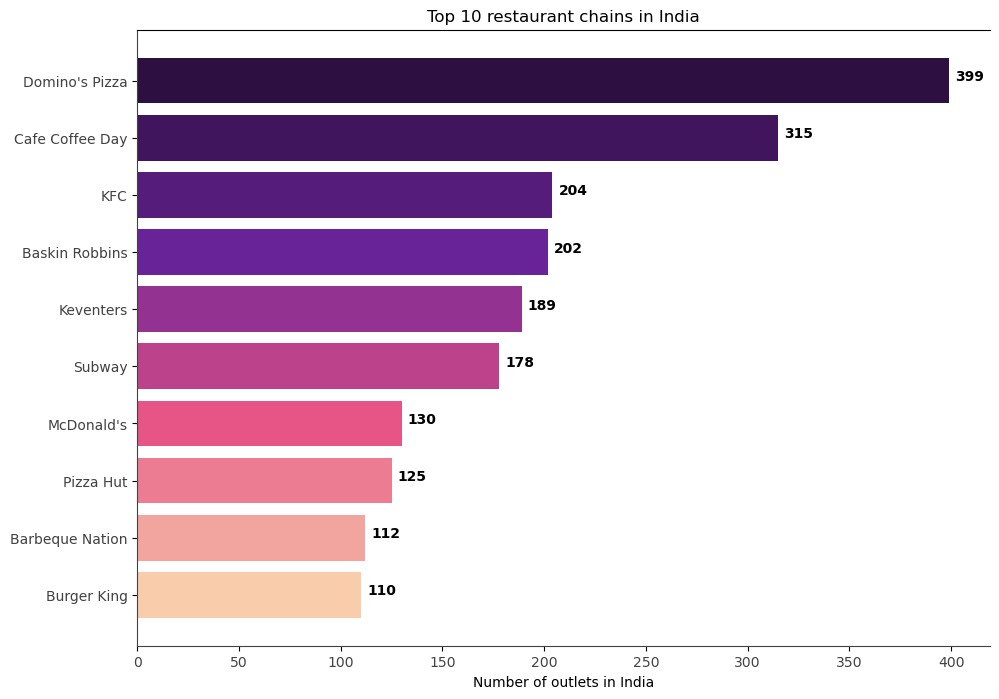

In [82]:
height = top10_foodchains.values
bars = top10_foodchains.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize = [11,8], frameon = False)
ax = fig.gca()
ax.spines['top'].set_visible("#424242")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#424242")
ax.spines['bottom'].set_color("#424242")

colors = ['#f9cdac', '#f2a49f', '#ec7c92', '#e65586','#bc438b', '#933291','#692398','#551c7b','#41155e','#2d0f41']

plt.barh(y_pos, height, color = colors)

plt.xticks(color = "#424242")
plt.yticks(y_pos, bars, color = "#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    plt.text(v + 3, i, str(v), color = 'black', fontweight = 'bold')
plt.title("Top 10 restaurant chains in India")
plt.show()

Goal of the Code:
To create a horizontal bar chart showing the number of outlets of the top 10 restaurant chains in India, using custom colors and styled axes.

## Step-by-Step Explanation:
### Top10_foodchains is a pandas Series or DataFrame with names as index and outlet counts as values.

--> y_pos gives vertical positions for each horizontal bar.

--> figsize=[11,8]: Sets width and height of the figure (in inches).

--> frameon=False: Removes outer frame around the figure.

--> gca(): Gets current axes object to customize it.

--> Spines are the borders around the plot area.

--> Hides the top and right spines for a cleaner look.

--> Colors the left and bottom spines with a dark gray shade.

--> barh() plots horizontal bars.

--> Each bar corresponds to a restaurant chain with a unique color.

Changes the color of x and y-axis tick labels to match the dark gray theme.

Adds restaurant names as labels on the y-axis.

for i, v in enumerate(height):
plt.text(v + 3, i, str(v), color='black', fontweight='bold')

Iterates through each bar and places the actual value (number of outlets) at the end of each bar.

v + 3 shifts the label slightly right to avoid overlap with the bar.



plt.show()
Renders the complete chart in your notebook or script output.






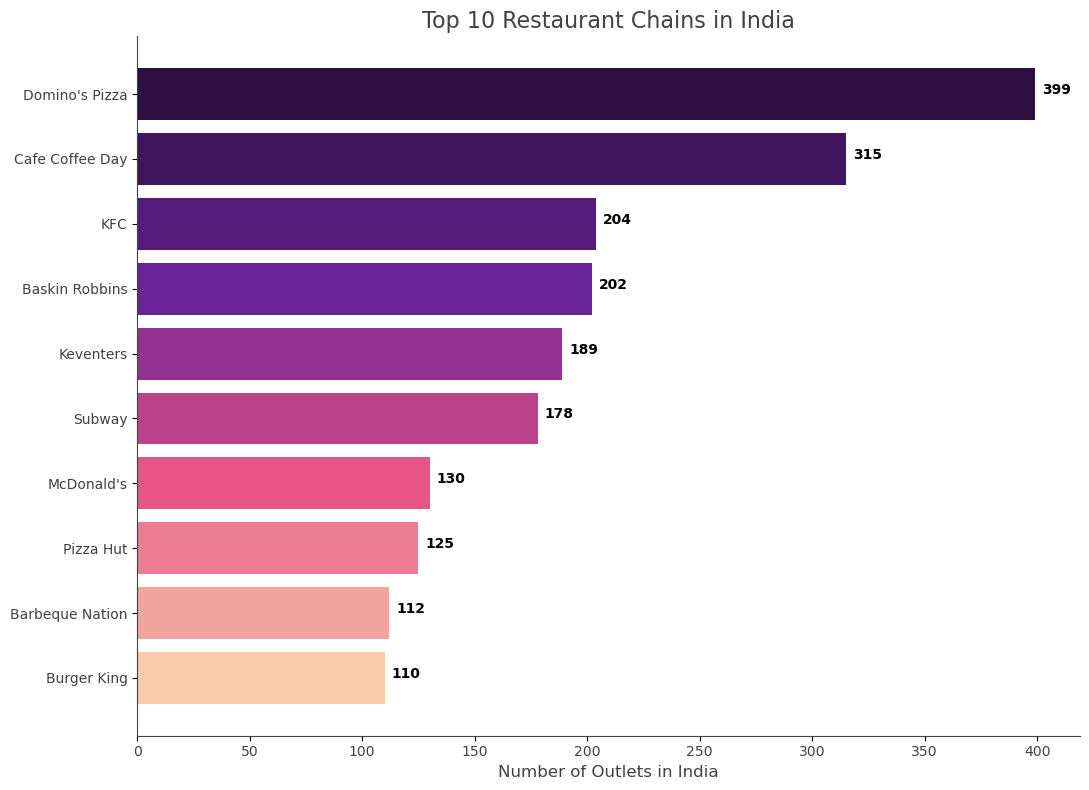

In [83]:
#another code for graphical representation of top 10 chains

height = top10_foodchains.values
bars = top10_foodchains.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,8], frameon=False)
ax = fig.gca()

# Set spine colors
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#424242")
ax.spines['bottom'].set_color("#424242")

colors = ['#f9cdac', '#f2a49f', '#ec7c92', '#e65586',
          '#bc438b', '#933291', '#692398', '#551c7b', '#41155e', '#2d0f41']

plt.barh(y_pos, height, color=colors)

plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of Outlets in India", fontsize=12, color="#424242")
plt.title("Top 10 Restaurant Chains in India", fontsize=16, color="#424242")

for i, v in enumerate(height):
    plt.text(v + 3, i, str(v), color='black', fontweight='bold')

plt.xlim(0, max(height) + 20)  # Prevent clipping
plt.tight_layout()
plt.show()


#### Now we look over the ratings which are having high average rating

We will look at the top chains by their average ratings. Here, that would be great if we conside number of outlest greater than 4. This helps us in remove some outliers and make our analsyis easy with out confusion .

In [84]:
outlets = data['name'].value_counts()

In [85]:
outlets

name
Domino's Pizza                           399
Cafe Coffee Day                          315
KFC                                      204
Baskin Robbins                           202
Keventers                                189
                                        ... 
Boulevard 69                               1
7-Eleven Restaurant                        1
Food station                               1
Silver Saloon - Taj Usha Kiran Palace      1
Geeta lodge                                1
Name: count, Length: 41100, dtype: int64

In [86]:
Minimum_outlets = outlets[outlets > 4]

In [87]:
Minimum_outlets

name
Domino's Pizza               399
Cafe Coffee Day              315
KFC                          204
Baskin Robbins               202
Keventers                    189
                            ... 
Pasta Street                   5
Red Chilli Snacks & Bakes      5
Bake N Shake                   5
Mahavir Ice Cream              5
Hyderabad Biryani              5
Name: count, Length: 743, dtype: int64

In [88]:
top10_chains2 = data[
    data["name"].isin(Minimum_outlets.index)
].groupby("name")["aggregate_rating"].mean().sort_values(ascending=False)[:10].sort_values(ascending=True)


#### Steps for above code:
1. Filter the Data for Specific Chains
2. Group by Chain Name
3. You now compute the average customer rating for each restaurant chain.




In [89]:
top10_chains2

name
The FML Lounge                  4.480000
Mocha                           4.481818
Pa Pa Ya                        4.500000
Agent Jack's                    4.516667
The Fisherman's Wharf           4.540000
Momo I Am                       4.560000
Chili's American Grill & Bar    4.620000
Pirates of Grill                4.620000
Chili's Grill & Bar             4.744444
AB's - Absolute Barbecues       4.775000
Name: aggregate_rating, dtype: float64

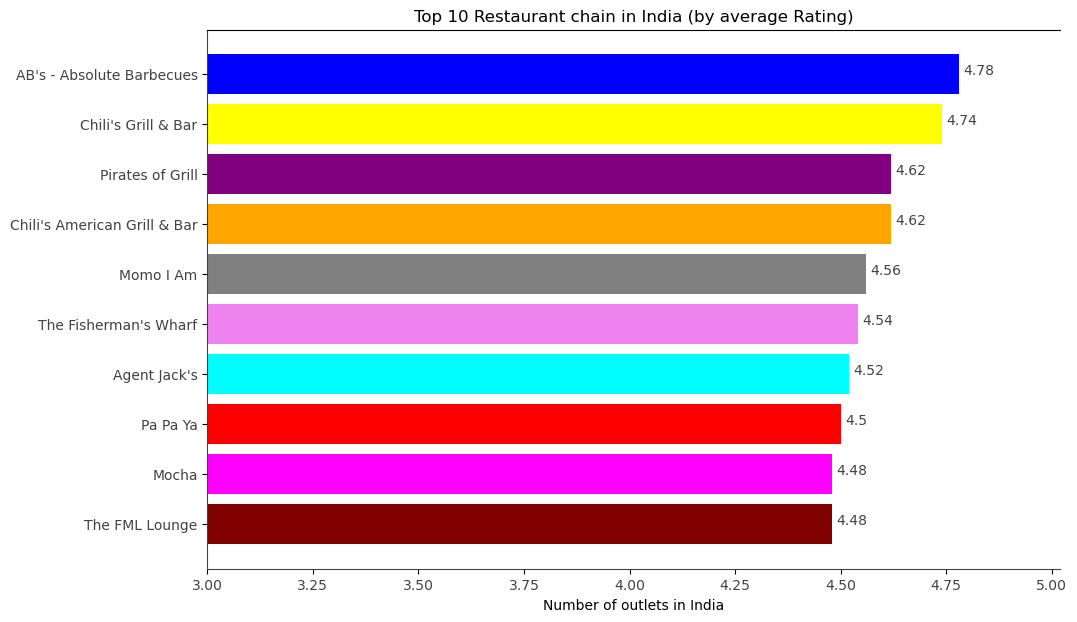

In [90]:
height = pd.Series(top10_chains2.values).map(lambda x : np.round(x, 2))
bars = top10_chains2.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
random.shuffle(colors)

#colors = ['#fded86', '#fce36b', '#f7c65d', '#f1a84f', '#ec8c41', '#e76f34', '#e25328', '#b04829', '#7e3e2b', '#4c3430']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v + 0.01, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in India (by average Rating)")


plt.show()


### Crazy analysis from Top 10 Restaurant chains in India and by their rating

Interestingly rating of the chains that have more outlets are low when we compare with the less outlets one.

By this we can say that, in food business opening of huge number of outlets doesn't directly increase our rating.

Now, we look into establishment

In [91]:
data['establishment']

0             Quick Bites
1             Quick Bites
2             Quick Bites
3             Quick Bites
4           Casual Dining
               ...       
211882    Dessert Parlour
211925      Casual Dining
211926      Casual Dining
211940        Quick Bites
211942        Quick Bites
Name: establishment, Length: 55568, dtype: object

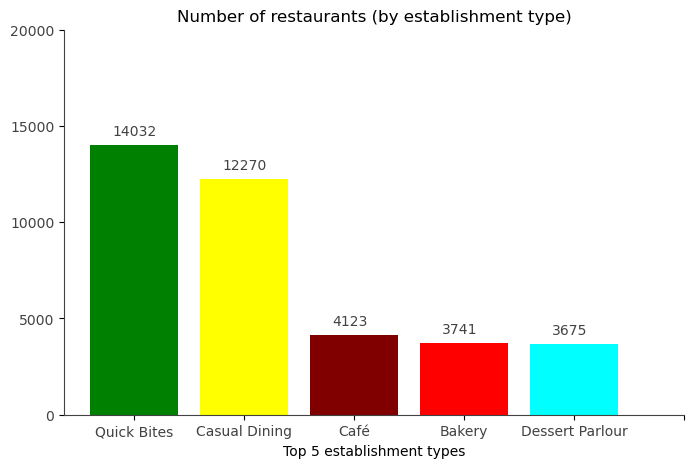

In [92]:
establishment_count = data.groupby("establishment").count()["res_id"].sort_values(ascending=False)[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
random.shuffle(colors)
plt.bar(establishment_count.index, establishment_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 25000, 5000), color="#424242")
plt.xlabel("Top 5 establishment types")

for i, v in enumerate(establishment_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by establishment type)")


plt.show()


By this we can say that top 3 are the kind of Quickbites, casual dining and cafe types in zomato. So in zomato more of quickbites kind of restaurants are present.


Now, looking into average rating, votes, photos(Taking establishmnet into consideration)

In [93]:
rating_establishment = data.groupby("establishment")["aggregate_rating"].mean().sort_values(ascending=False)[:10]
rating_establishment


establishment
Microbrewery     4.268182
Pub              3.758263
Cocktail Bar     3.531250
Fine Dining      3.436547
Lounge           3.436463
Club             3.378571
Irani Cafe       3.321429
Casual Dining    3.238680
Café             3.212345
Butcher Shop     3.110390
Name: aggregate_rating, dtype: float64

In [94]:
data.groupby("establishment")["votes"].mean().sort_values(ascending=False)[:10]


establishment
Microbrewery     1992.300000
Pub               880.274510
Bar               500.613295
Lounge            494.509756
Casual Dining     396.339935
Cocktail Bar      309.625000
Club              300.544643
Fine Dining       293.126384
Café              276.558574
Irani Cafe        178.714286
Name: votes, dtype: float64

In [95]:
data.groupby("establishment")["photo_count"].mean().sort_values(ascending=False)[:10]


establishment
Microbrewery     2042.054545
Pub               652.955182
Cocktail Bar      555.625000
Lounge            514.687805
Bar               513.321658
Fine Dining       364.817590
Café              331.935969
Casual Dining     291.550448
Irani Cafe        173.000000
Club              107.089286
Name: photo_count, dtype: float64

We can conclude from here that the places or restaurants serving alcohol and adult juices are having highest rating, highest votes and photos

### Number of restaurants are present in cities

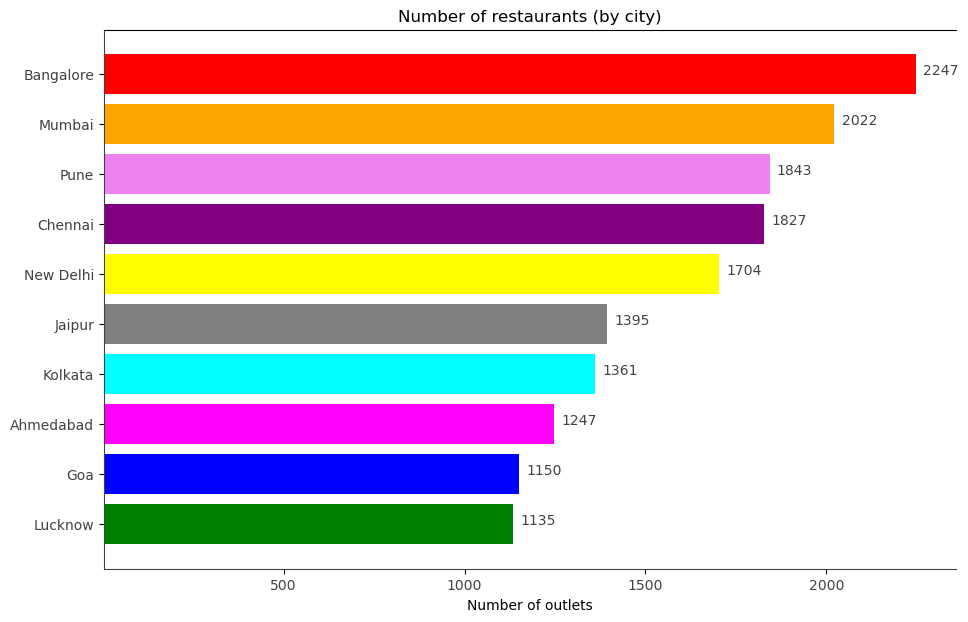

In [96]:
city_restaurants = data.groupby("city").count()["res_id"].sort_values(ascending=True)[-10:]

height = pd.Series(city_restaurants.values)
bars = city_restaurants.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)

#colors = ['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686', '#18216b', '#11174b']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets")

for i, v in enumerate(height):
    ax.text(v + 20, i, str(v), color='#424242')
plt.title("Number of restaurants (by city)")


plt.show()

We can say from here that, metro cities are having highest number of restaurants

### Previously we have perfomed average_rating, votes and photos by consdiering establishment, now we will perform with cities as consideration.

In [97]:
rating_city = data.groupby("city")["aggregate_rating"].mean().sort_values(ascending=False)[:10]
rating_city


city
Gurgaon         3.828525
Secunderabad    3.822222
Hyderabad       3.755839
Kolkata         3.751947
New Delhi       3.727347
Mumbai          3.709298
Bangalore       3.698175
Noida           3.620307
Chennai         3.597701
Pune            3.509224
Name: aggregate_rating, dtype: float64

In [98]:
data.groupby("city")['votes'].mean().sort_values(ascending=False)

city
Hyderabad       955.549878
Secunderabad    955.433333
Mumbai          797.158259
Bangalore       724.940365
New Delhi       711.116197
                   ...    
Amravati          2.102632
Palakkad          1.947368
Junagadh          1.427835
Alappuzha         0.815686
Kharagpur         0.469388
Name: votes, Length: 99, dtype: float64

In [99]:
data.groupby('city')['photo_count'].mean().sort_values(ascending=False)[:5]

city
Mumbai         882.273492
New Delhi      764.258216
Gurgaon        678.491803
Kolkata        667.558413
Navi Mumbai    547.323671
Name: photo_count, dtype: float64

### Highlights/Features of restaurants
### Unique highlights


In [100]:
print(data['highlights'].nunique())

31228


In [101]:
data['highlights']

0         ['Lunch', 'Takeaway Available', 'Credit Card',...
1         ['Delivery', 'No Alcohol Available', 'Dinner',...
2         ['No Alcohol Available', 'Dinner', 'Takeaway A...
3         ['Takeaway Available', 'Credit Card', 'Lunch',...
4         ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...
                                ...                        
211882    ['Cash', 'Takeaway Available', 'Delivery', 'In...
211925    ['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...
211926    ['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...
211940    ['Dinner', 'Cash', 'Takeaway Available', 'Debi...
211942    ['Dinner', 'Delivery', 'Credit Card', 'Lunch',...
Name: highlights, Length: 55568, dtype: object

In [102]:
h = []
data["highlights"].apply(lambda x : h.extend(x[2:-2].split("', '")))
h = pd.Series(h)
print("Total number of unique highlights = ", h.nunique())


Total number of unique highlights =  104


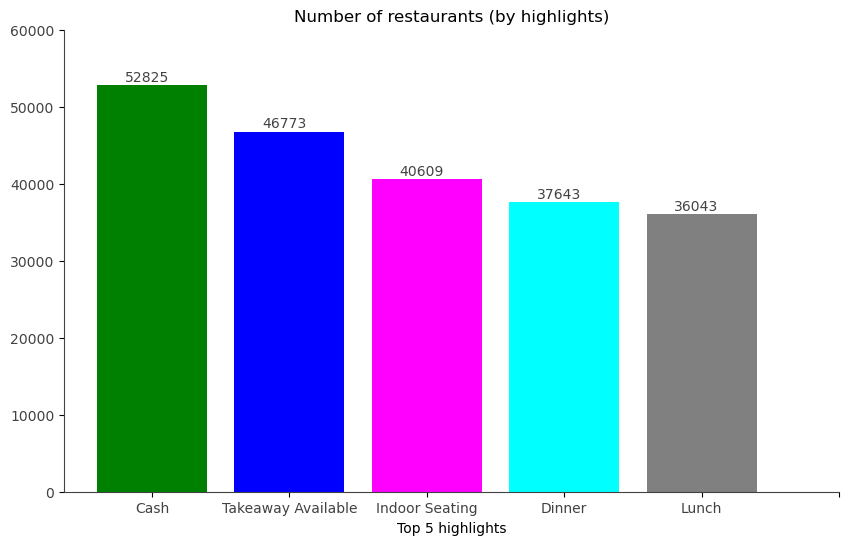

In [103]:
h_count = h.value_counts()[:5]

fig = plt.figure(figsize=[10,6], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
#colors = ['#11174b', '#2a5599', '#3e94c0', '#78c6d0', '#dcecc9']
plt.bar(h_count.index, h_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 70000, 10000), color="#424242")
plt.xlabel("Top 5 highlights")

for i, v in enumerate(h_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by highlights)")


plt.show()


We can say that the top features, doesn't say more about the highlights as they are common in every restaurant

## Highest Rated Highlights among restaurants in Zomato India

In [104]:
data["highlights"][0]


"['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"

In [105]:
data["highlights2"] = data['highlights'].apply(lambda x : x[2:-2].split("', '"))

h_list = h.unique().tolist()
zeros = np.zeros(shape=(len(h_list),2))
h_and_r = pd.DataFrame(zeros, index=h_list, columns=["Sum","Total"])


In [106]:
h_and_r["Mean"] = h_and_r["Sum"] / h_and_r["Total"]
h_and_r


,Sum,Total,Mean
Lunch,0.0,0.0,NaN
Takeaway Available,0.0,0.0,NaN
Credit Card,0.0,0.0,NaN
Dinner,0.0,0.0,NaN
Cash,0.0,0.0,NaN
...,...,...,...
Celebrity Frequented,0.0,0.0,NaN
Alipay Accepted,0.0,0.0,NaN
Subscription Available,0.0,0.0,NaN
Subscription Required,0.0,0.0,NaN


In [107]:
h_and_r[["Mean","Total"]].sort_values(by="Mean", ascending=False)[:10]


,Mean,Total
Lunch,NaN,0.0
Takeaway Available,NaN,0.0
Credit Card,NaN,0.0
Dinner,NaN,0.0
Cash,NaN,0.0
Air Conditioned,NaN,0.0
Indoor Seating,NaN,0.0
Pure Veg,NaN,0.0
Delivery,NaN,0.0
No Alcohol Available,NaN,0.0


Features like Gastro pub, Craft beer, Romantic dining and Sneakpeek are well received among customers.



#Let us create word cloud of top highlights

C:\Users\SHOBHA REDDY\AppData\Local\Temp\ipykernel_6120\1006744165.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['aggregate_rating'], shade=True)


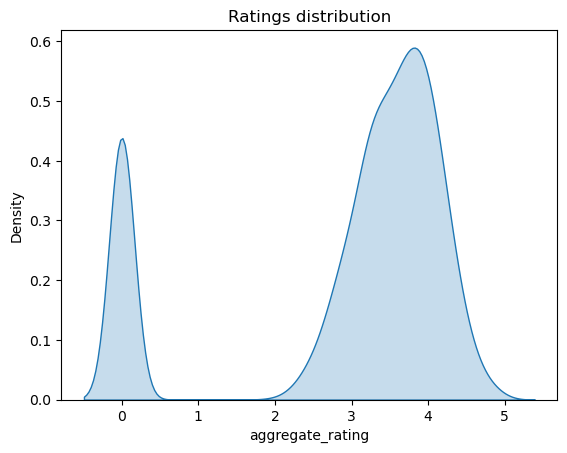

In [108]:
# rating vs Cost distribution

sns.kdeplot(data['aggregate_rating'], shade=True)
plt.title("Ratings distribution")
plt.show()

#There is a huge spike at 0 which might account for newly opened or unrated restaurants. On average, majority of restaurants have rating between 3 to 4 with fewer restaurants managing to go beyond 4.



C:\Users\SHOBHA REDDY\AppData\Local\Temp\ipykernel_6120\2260240071.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['average_cost_for_two'], shade=True)


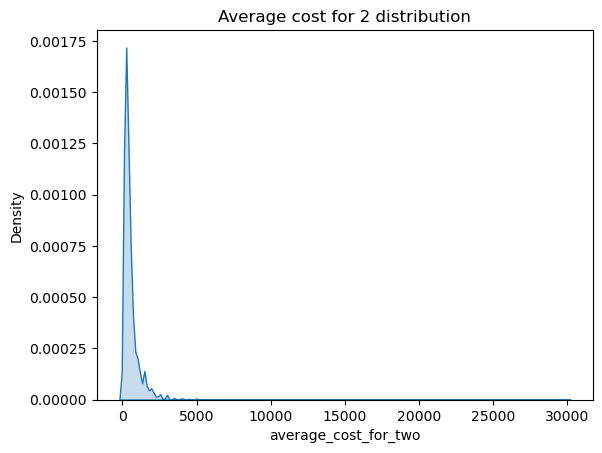

In [109]:
#Average cost of two
sns.kdeplot(data['average_cost_for_two'], shade=True)
plt.title("Average cost for 2 distribution")
plt.show()


C:\Users\SHOBHA REDDY\AppData\Local\Temp\ipykernel_6120\339298703.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['average_cost_for_two'], shade=True)


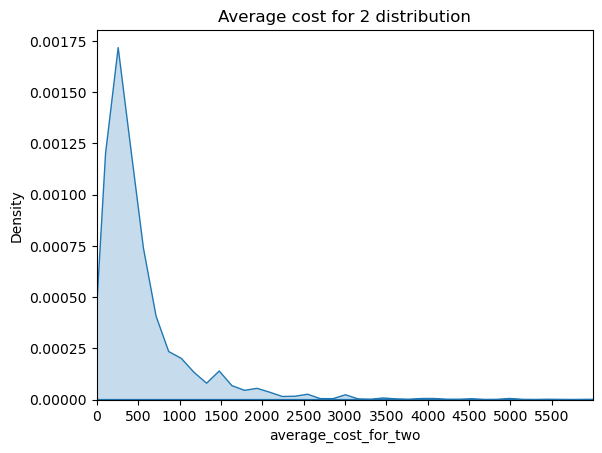

In [110]:
sns.kdeplot(data['average_cost_for_two'], shade=True)
plt.xlim([0, 6000])
plt.xticks(range(0,6000,500))
plt.title("Average cost for 2 distribution")
plt.show()


Most of the restaurants are budget friendly with amount ranging between 500

### Number of restaurants with their price range

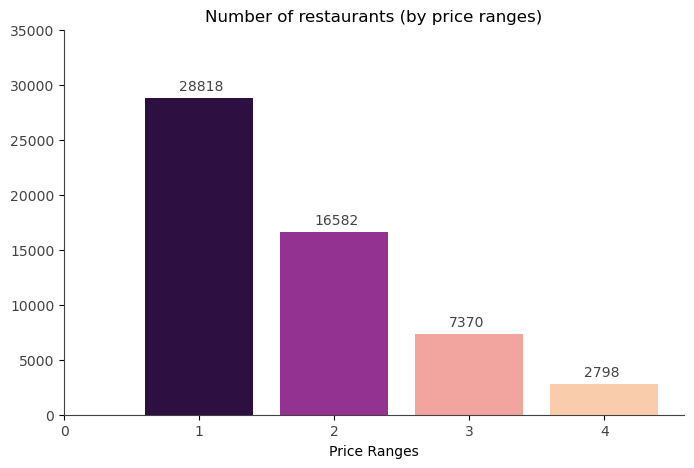

In [111]:
price_count = data.groupby("price_range").count()["name"]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#2d0f41",'#933291',"#f2a49f","#f9cdac"]
plt.bar(price_count.index, price_count.values, color=colors)

plt.xticks(range(0, 5), color="#424242")
plt.yticks(range(0, 40000, 5000), color="#424242")
plt.xlabel("Price Ranges")

for i, v in enumerate(price_count):
    ax.text(i+0.85, v+700, str(v), color='#424242')
plt.title("Number of restaurants (by price ranges)")


plt.show()


We can note something interesting here, as the price range increases, the number of restaurants having high price are low.

In [112]:
#relation between price_range and rating

np.round(data[["price_range","aggregate_rating"]].corr()["price_range"][1],2)

#they are positively correlated


C:\Users\SHOBHA REDDY\AppData\Local\Temp\ipykernel_6120\302086780.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.round(data[["price_range","aggregate_rating"]].corr()["price_range"][1],2)


0.25

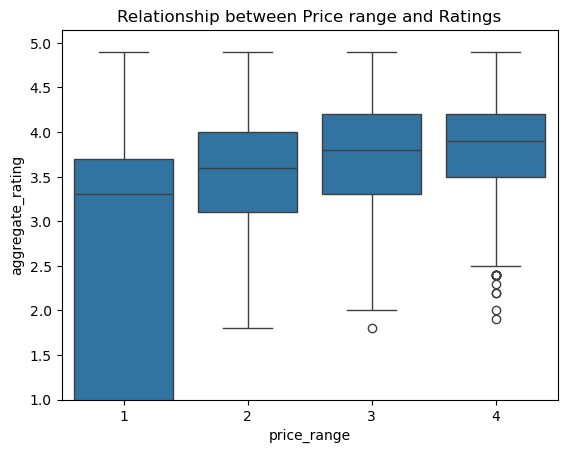

In [113]:
sns.boxplot(x='price_range', y='aggregate_rating', data=data)
plt.ylim(1)
plt.title("Relationship between Price range and Ratings")
plt.show()
#Now, it is clear. The higher the price a restaurant charges, more services they provide and hence more chances of getting good ratings from their customers.



#Conclusions:
After working on this data, we can conclude the following things:-

1. 35% of restaurants in India are part of some chain
2. Domino's Pizza, Cafe Coffee Day, KFC are the biggest fast food chains in the country with most number of outlets
3. Barbecues and Grill food chains have highest average ratings than other type of restaurants
4. Quick bites and casual dining type of establishment have most number of outlets
5.Establishments with alcohol availability have highest average ratings, votes and photo uploads
6. Banglore has most number of restaurants
7. Gurgaon has highest rated restaurants (average 3.83) whereas Hyderabad has more number of critics (votes). Mumbai and New Delhi dominates for most photo uploads per outlet
8. Gastro pub, Romantic Dining and Craft Beer features are well rated by customers
9. Most restaurants are rated between 3 and 4
10. There are less number of restaurants at higher price ranges
11. As the average cost of two increases, the chance of a restaurant having higher rating increases
